# Assignment 10
## Due July 03th
### names:

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from numpy.linalg import inv, eig
from copy import deepcopy
from sklearn.cluster import KMeans

np.random.seed(42)

In [6]:
import scipy.io
mat = scipy.io.loadmat('assignment10data.mat')
X = mat['X']

## Exercise 1

### a)

<IPython.core.display.Javascript object>


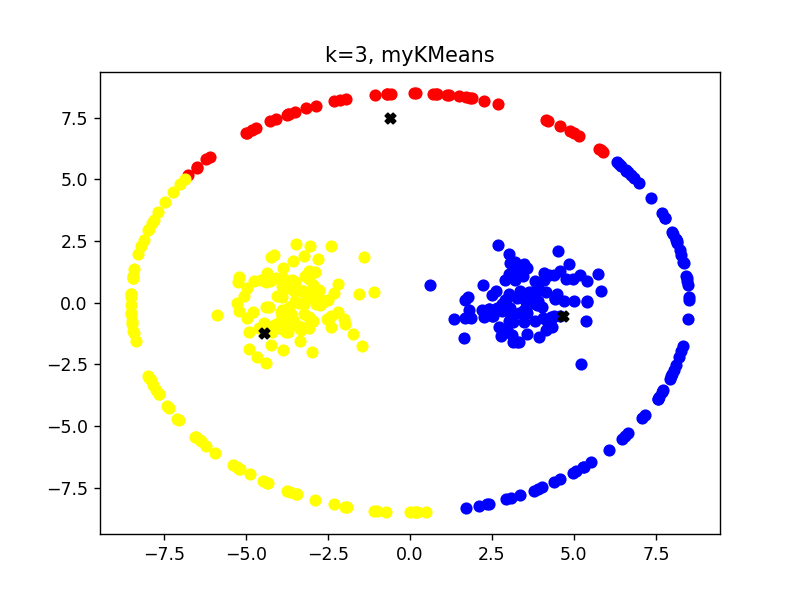

Text(0.5,1,'k=3, myKMeans')

In [7]:
def myKMeans(X, k):
    c_x = np.random.randint(np.min(X), np.max(X), size=k)
    c_y = np.random.randint(np.min(X), np.max(X), size=k)
    c = np.array(list(zip(c_x, c_y)), dtype = np.float32)
    
    c_old = np.zeros(c.shape)
    clusters = np.zeros(len(X))
    error = np.linalg.norm(c - c_old, axis=None)
    while error != 0:
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - c, axis=1)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        c_old = deepcopy(c)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            c[i] = np.mean(points, axis = 0)
        error = np.linalg.norm(c - c_old, axis=None)
    return c,clusters

#fig = plt.figure()
fig, ax = plt.subplots()
colors = ['red', 'yellow', 'blue', 'green', 'cyan', 'magenta']

k = 3
# sklearn KMeans
#c = KMeans(n_clusters=k).fit(X)
#clusters = KMeans(n_clusters=k).fit_predict(X)
#ax = fig.add_subplot(2, 1, 1)
#for i in range(k):
#    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#ax.scatter(c.cluster_centers_[:, 0], c.cluster_centers_[:, 1], marker = 'X', c='black')
#ax.set_title('k=3, sklearn')

# myKMeans
c, clusters = myKMeans(X, k)
#ax = fig.add_subplot(2, 1, 2)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c[:, 0], c[:, 1], marker = 'X', c='black')
ax.set_title('k=3, myKMeans')

#plt.tight_layout()

# b)

<IPython.core.display.Javascript object>


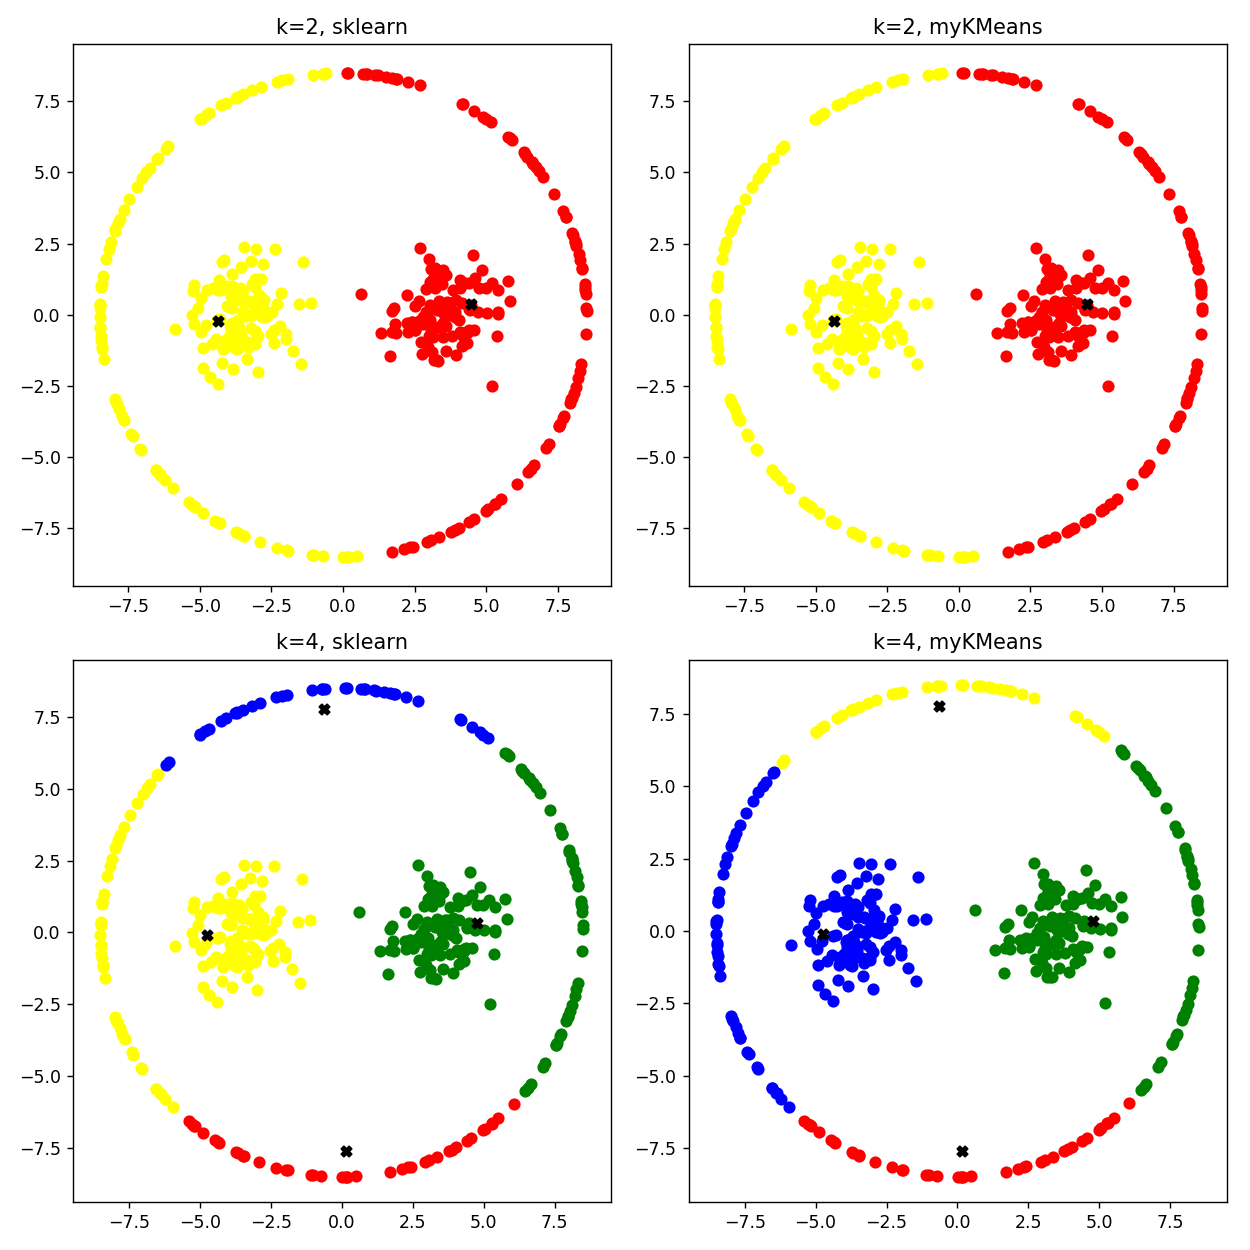

In [8]:
#fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
colors = ['red', 'yellow', 'blue', 'green', 'cyan', 'magenta']

#k = 3
## sklearn KMeans
#c = KMeans(n_clusters=k).fit(X)
#clusters = KMeans(n_clusters=k).fit_predict(X)
#ax = fig.add_subplot(3, 2, 1)
#for i in range(k):
#    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#ax.scatter(c.cluster_centers_[:, 0], c.cluster_centers_[:, 1], marker = 'X', c='black')
#ax.set_title('k=3, sklearn')

## myKMeans
#c, clusters = myKMeans(X, k)
#ax = fig.add_subplot(3, 2, 2)
#for i in range(k):
#    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#ax.scatter(c[:, 0], c[:, 1], marker = 'X', c='black')
#ax.set_title('k=3, myKMeans')

k = 2
# sklearn KMeans
c = KMeans(n_clusters=k).fit(X)
clusters = KMeans(n_clusters=k).fit_predict(X)
ax = fig.add_subplot(2, 2, 1)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c.cluster_centers_[:, 0], c.cluster_centers_[:, 1], marker = 'X', c='black')
ax.set_title('k=2, sklearn')

# myKMeans
c, clusters = myKMeans(X, k)
ax = fig.add_subplot(2, 2, 2)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c[:, 0], c[:, 1], marker = 'X', c='black')
ax.set_title('k=2, myKMeans')

k = 4
# sklearn KMeans
c = KMeans(n_clusters=k).fit(X)
clusters = KMeans(n_clusters=k).fit_predict(X)
ax = fig.add_subplot(2, 2, 3)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c.cluster_centers_[:, 0], c.cluster_centers_[:, 1], marker = 'X', c='black')
ax.set_title('k=4, sklearn')

# myKMeans
c, clusters = myKMeans(X, k)
ax = fig.add_subplot(2, 2, 4)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c[:, 0], c[:, 1], marker = 'X', c='black')
ax.set_title('k=4, myKMeans')

plt.tight_layout()

### c)

In [9]:
def generateKNNgraph(X, k):
    #c, clusters = myKMeans(X, k)
    clusters = KMeans(n_clusters=k).fit_predict(X)
    
    n = len(X)
    knnW = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if clusters[i] == clusters[j]:
                knnW[i, j] = 1
            else:
                knnW[i, j] = 0
    return knnW

def spectralClustering(W, k, normalised):
    n = len(W)
    D = np.zeros((n, n))
    D = np.diag(np.sum(W, axis=0))
    if normalised == 0: # unnormalised
        L = D - W

        Lam, V = eig(L)
        #sorted_index = np.argsort(Lam.real)
        sorted_index = np.argsort(Lam)
        Lam_K = Lam[sorted_index][0:k]
        V_K = V[sorted_index][0:k]
        print(np.shape(V_K))
        Y = np.zeros((k, n))
        for i in range(k):
            Y[i] = V_K[i, :]
        #c = KMeans(n_clusters=k).fit(V_K.T.real)
        #clusters = KMeans(n_clusters=k).fit_predict(V_K.T.real)
        print(np.shape(Y))
        c = KMeans(n_clusters=k).fit(Y.T)
        clusters = KMeans(n_clusters=k).fit_predict(Y.T)
    elif normalised == 1: # normalised
        L = np.matmul(np.matmul(pow(D, (-1/2)), (D-W)), pow(D, (-1/2)))
        Lam, V = eig(L)
        sorted_index = np.argsort(Lam)
        V_K = V[sorted_index][1]
        g = np.matmul(pow(D, (-1/2)), V_K)
        c = KMeans(n_clusters=k).fit(W)
        clusters = KMeans(n_clusters=k).fit_predict(W)
    
    return c, clusters

(3, 400)
(3, 400)


C:\Users\KAJI\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


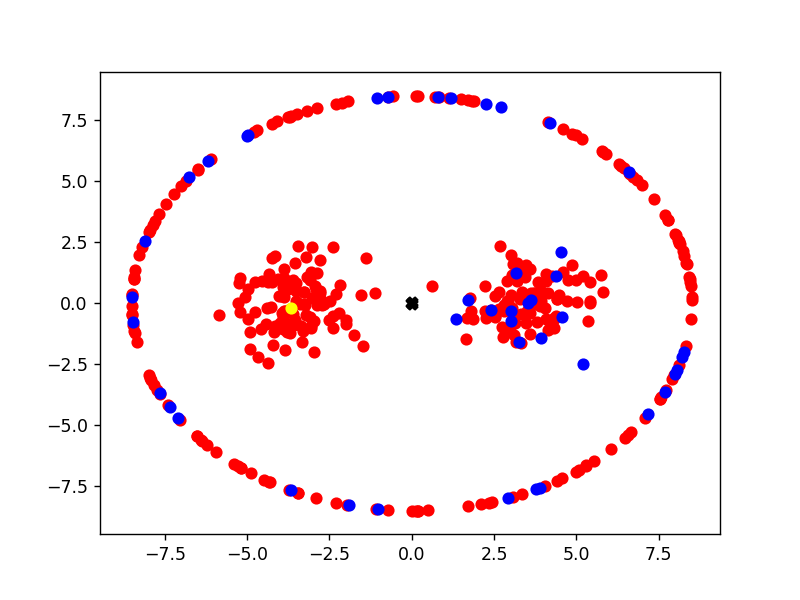

In [10]:
k = 3
knnW = generateKNNgraph(X, k)
c, clusters = spectralClustering(knnW, k, normalised=0)

fig, ax = plt.subplots()
colors = ['red', 'yellow', 'blue', 'green', 'cyan', 'magenta']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(c.cluster_centers_[:, 0], c.cluster_centers_[:, 1], marker = 'X', c='black')